In [2]:
import pandas as pd
import numpy as np
import umap
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [4]:
data = np.random.normal(0, 1, (100, 1000))

In [10]:
fit = umap.UMAP().fit_transform(data.T)

In [45]:
def umap_gauss(n_points, ax, rand_func, rand_func_args, umap_kwargs={}, **kwargs):
    """
    A wrapper function to generate vectors from a single distribution
    
    n_points:    int. Number of points to sample
    ax:          matplotlib.pyplot.ax
    rand_func:   np.random function. Function to draw points from
    rand_func_args:    tuple. Tuple of arguments to specify function location and spread
    umap_kwargs:       dict. Args to pass to UMAP
    kwargs:            dict. Args to pass to ax.scatter()
    """
    data = rand_func(*rand_func_args, size=(n_points, 100))
    fit = umap.UMAP(**umap_kwargs).fit_transform(data)
    ax.scatter(*fit.T, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

In [69]:
def plot_umap(rand_func, rand_func_args, umap_kwargs={}, **kwargs):
    points = 10 ** (np.linspace(1, 3, 5))

    fig, ax = plt.subplots(ncols=len(points), nrows=3, figsize=(20, 10))
    for i, ai in enumerate(ax.T):
        for aj in ai:
            umap_gauss(int(points[i]), aj, label=points[i],
                       rand_func=rand_func, rand_func_args=rand_func_args,
                       umap_kwargs=umap_kwargs, **kwargs)
    
        ai[0].set_title('Points={:.0e}'.format(points[i]))

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


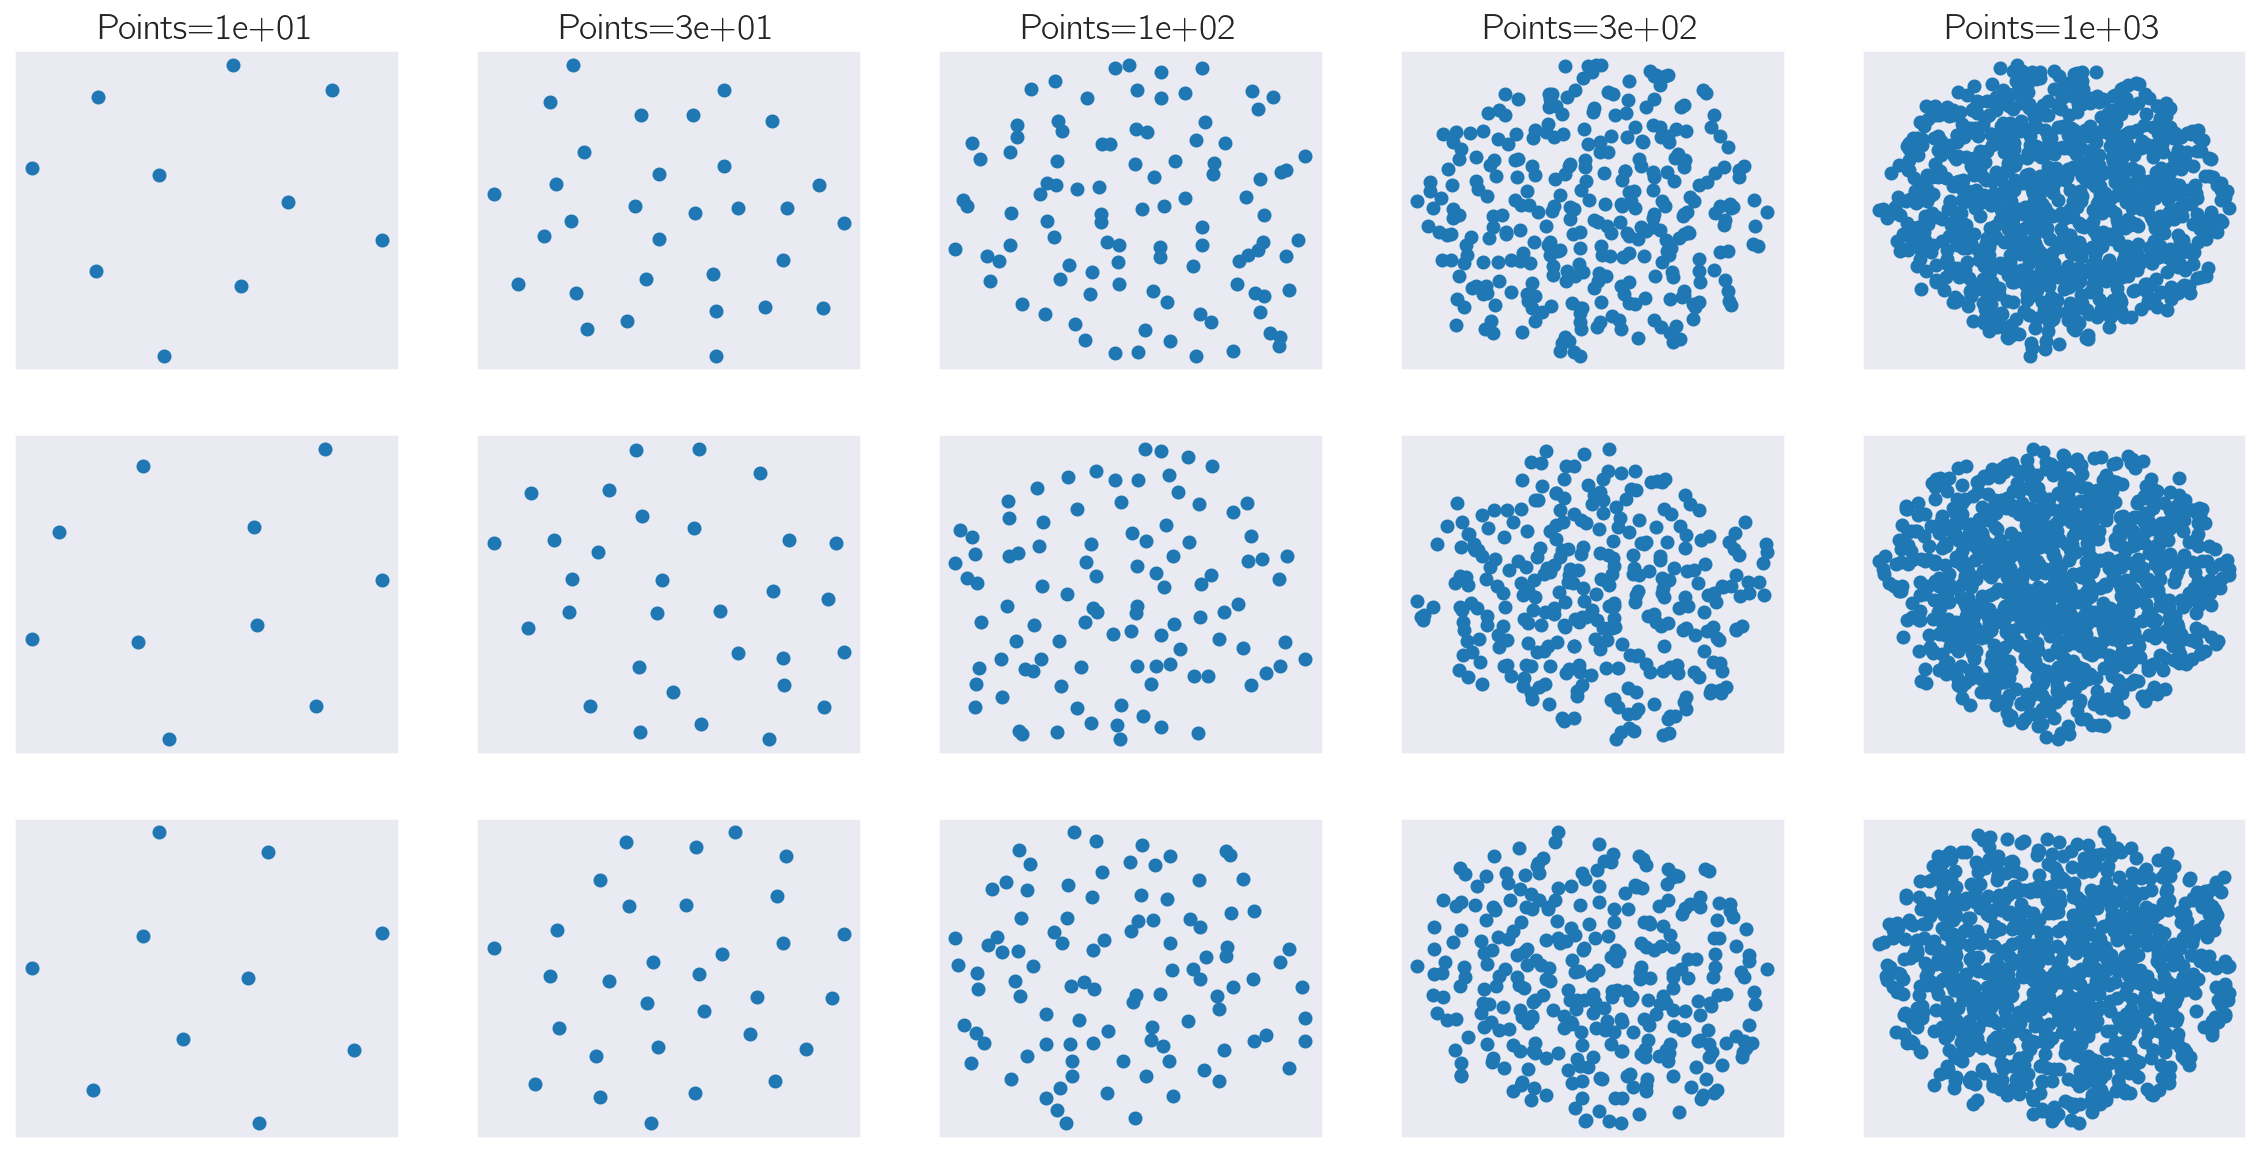

In [70]:
plot_umap(np.random.normal, (0, 1))

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


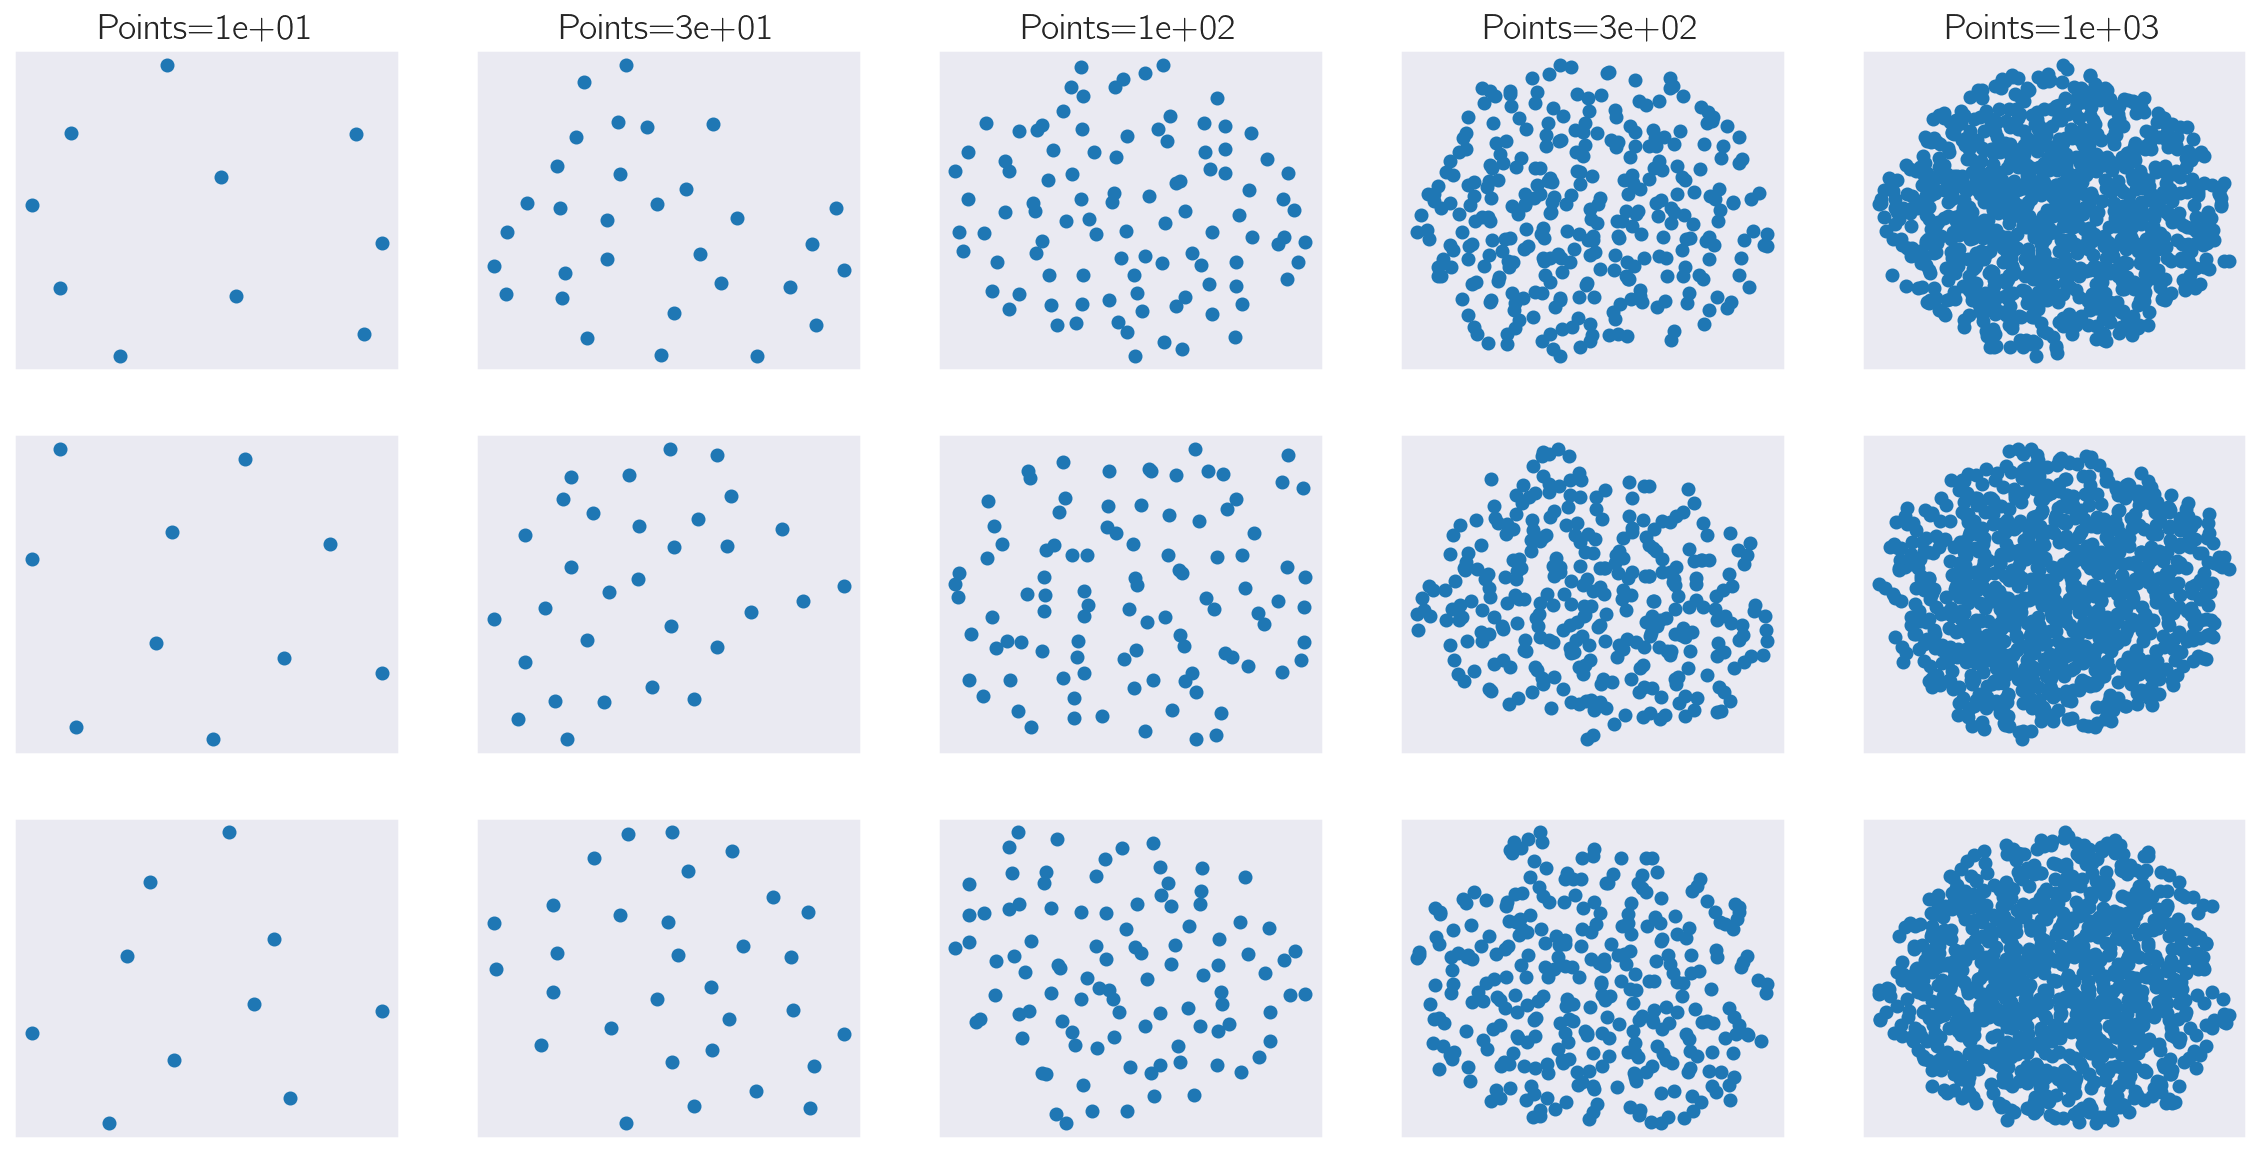

In [71]:
plot_umap(np.random.poisson, (5,))

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/umap/umap_.py:2214: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


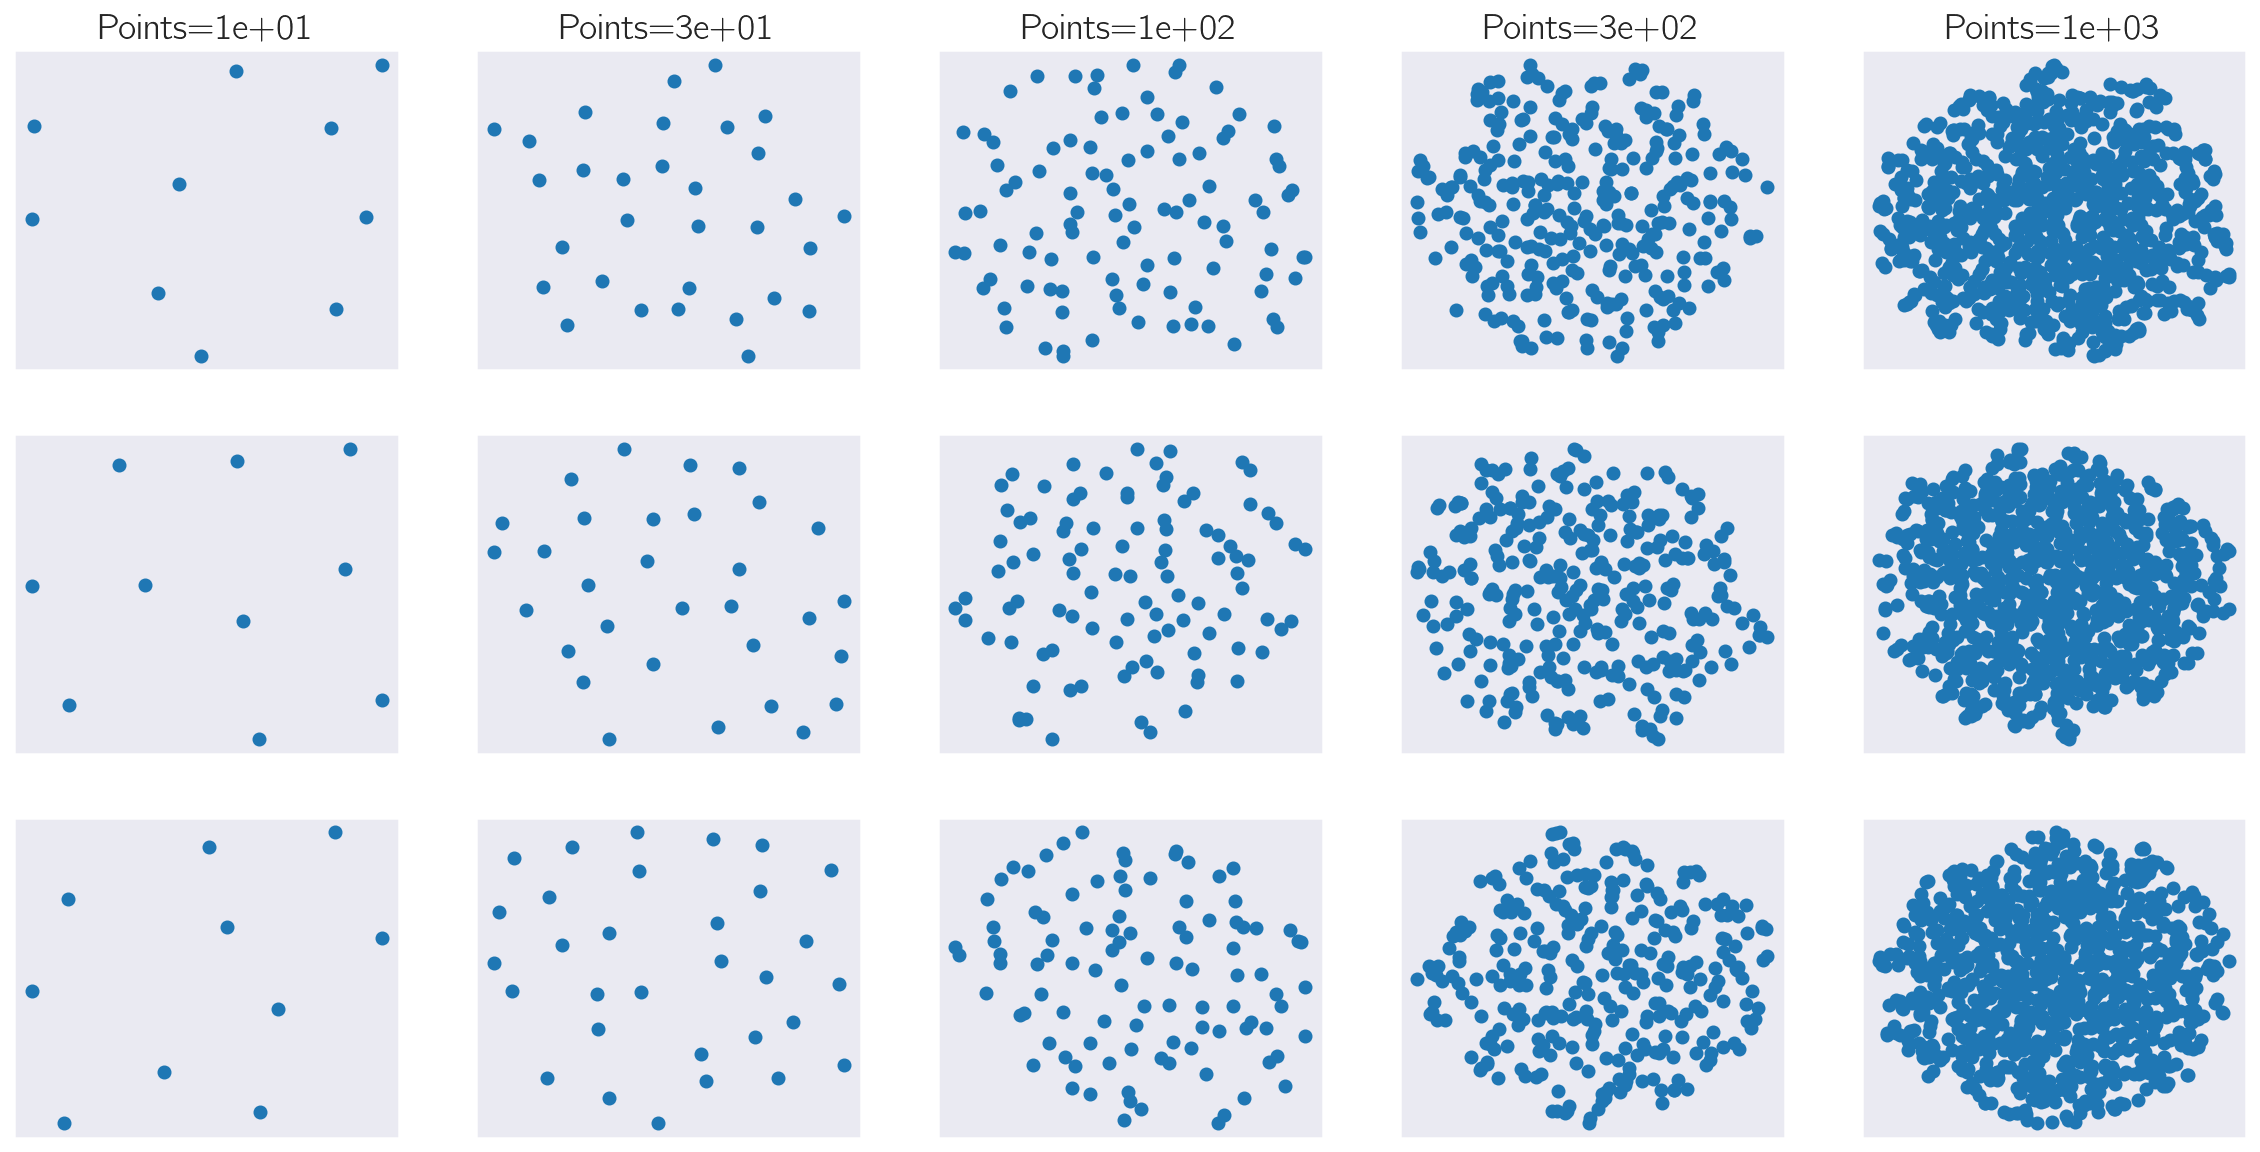

In [74]:
plot_umap(np.random.normal, (0, 1), umap_kwargs={'min_dist': 0, 'metric':'manhattan'})

/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/davidangeles/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Gr

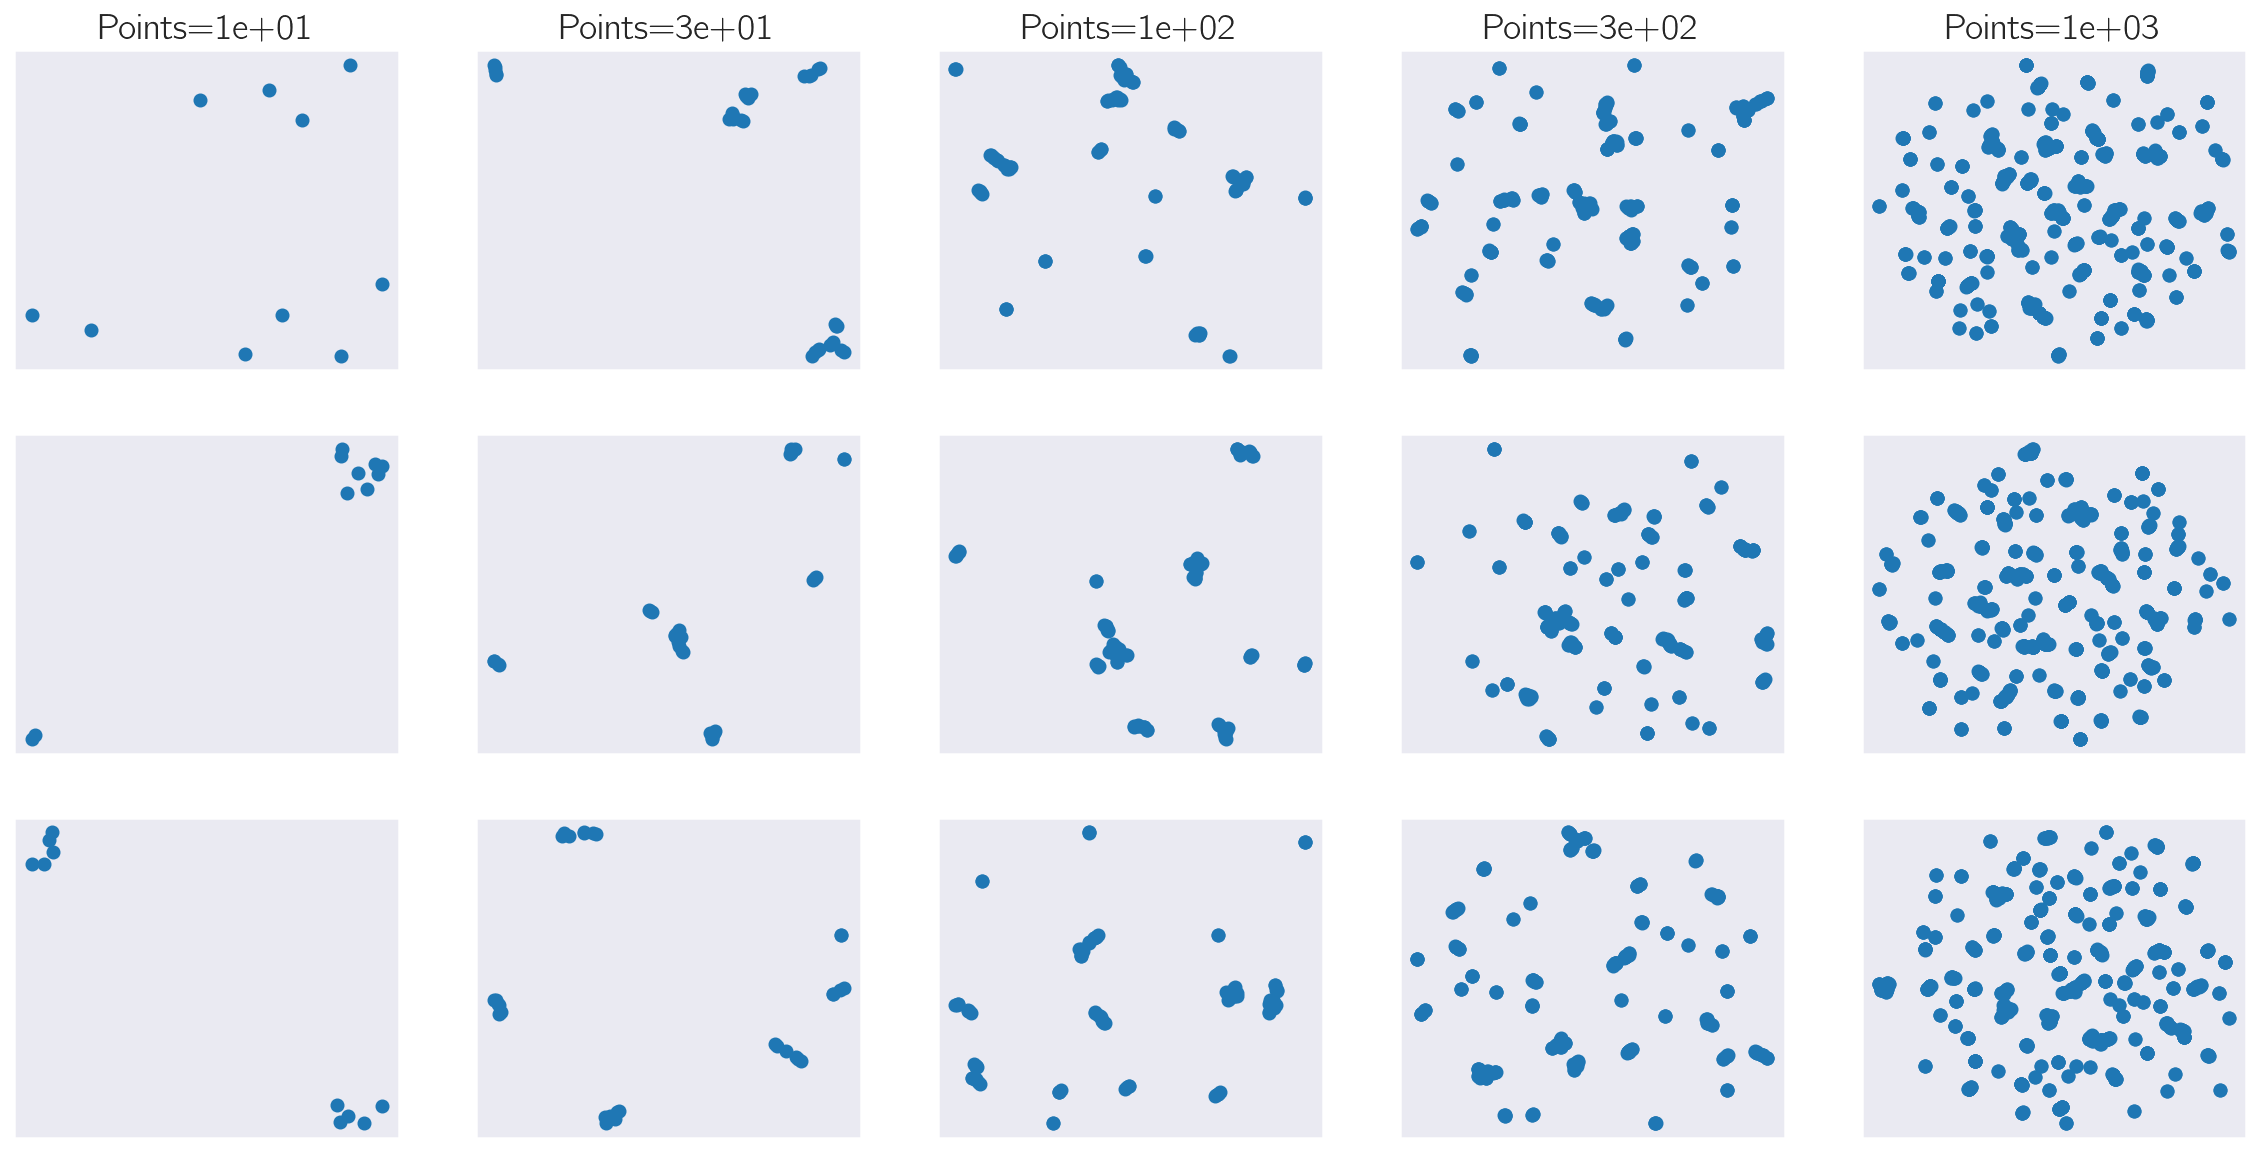

In [76]:
plot_umap(np.random.normal, (0, 1), umap_kwargs={'min_dist': 0, 'metric':'manhattan', 'n_neighbors': 2})